In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from matplotlib.pyplot import figure

In [3]:
data = pd.read_csv('proc_d.csv')
data

,uname_length,fname_length,fname_words,desc_length,desc_words,has_ext_link,has_profile_pic,has_contact,age,posts,...,friends_count,highlights,has_cat,has_reels,has_igtv,has_tagged_photos,is_private,is_verified,reports,is_fake
0,10,5,1,9,1,1,1,1,22,158,...,37,7,1,0,0,1,0,0,0,0
1,7,5,1,1,1,0,1,0,28,63,...,35,6,0,0,1,0,1,0,0,0
2,14,10,2,0,1,1,1,0,13,51,...,21,4,0,0,1,1,1,0,0,0
3,15,12,2,0,1,1,1,1,12,7,...,34,3,0,1,1,1,0,0,0,0
4,10,13,2,0,1,0,1,0,12,6,...,37,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,15,13,2,0,1,0,1,0,29,0,...,0,0,0,0,0,0,0,0,0,1
1015,11,10,2,0,1,0,1,0,23,0,...,10,0,0,0,0,0,0,0,0,1
1016,12,0,1,0,1,0,1,0,31,3,...,23,0,0,0,0,0,1,0,0,1
1017,11,4,1,4,2,0,1,0,33,2,...,17,1,0,0,0,1,1,0,0,1


In [7]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data.drop(['is_fake'],axis=1), data['is_fake'], test_size=0.3)

In [8]:
# start = time.process_time()
RFC = RandomForestClassifier(n_estimators=600)
trainedforest = RFC.fit(X_Train,Y_Train)
# print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[170   2]
 [  1 133]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.99      0.99      0.99       134

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



In [9]:
figure(num=None, figsize=(50, 50), dpi=40, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= X_Train.columns)
feat_importances.nlargest(25)

fname_length         0.230631
has_igtv             0.174021
followers            0.103481
reports              0.087872
fname_words          0.069642
desc_length          0.068986
posts                0.050305
desc_words           0.042317
age                  0.033470
followings           0.027688
highlights           0.025607
uname_length         0.024341
has_profile_pic      0.020160
has_ext_link         0.014929
has_tagged_photos    0.008481
friends_count        0.005577
is_private           0.004537
has_contact          0.003543
has_reels            0.002335
has_cat              0.002077
is_verified          0.000000
dtype: float64

<Figure size 2000x2000 with 0 Axes>

In [10]:
X_Train2 = X_Train[['fname_length','has_igtv', 'followers','reports','fname_words','desc_length','posts']]
X_Test2 = X_Test[['fname_length','has_igtv', 'followers','reports','fname_words','desc_length','posts']]

In [18]:
# start = time.process_time()
RFC = RandomForestClassifier(n_estimators=600)
trainedforest = RFC.fit(X_Train2,Y_Train)
# print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

[[169   3]
 [  0 134]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       172
           1       0.98      1.00      0.99       134

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



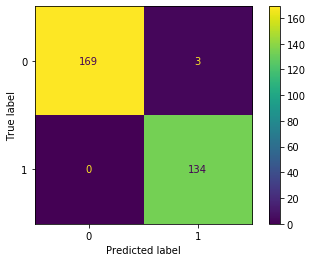

In [19]:
plot_confusion_matrix(trainedforest, X_Test2, Y_Test)